<a href="https://colab.research.google.com/github/byein/pytorch_yolo/blob/main/pytorch_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2, torch
from google.colab.patches import cv2_imshow

In [ ]:
# Check whether GPU is available or not
print(torch.cuda.is_available())
!nvidia-smi

True
Fri Dec 10 11:28:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    27W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+--

In [ ]:
# Load the YOLOv5 model from the Pytorch Hub (https://pytorch.org/hub/)
yolov5 = torch.hub.load('ultralytics/yolov5', 'yolov5l', pretrained=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 2021-12-10 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)



  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



  0%|          | 0.00/89.2M [00:00<?, ?B/s]

Fusing layers... 
Model Summary: 367 layers, 46533693 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
# Download an image from internet
!wget -c 'https://w.namu.la/s/c5084a55cf5c03f94f9f507ed982436a312045f484bf64feb16327407b607d571f415f78ef9e343b89bcc88637532f2d3a91ab6c6f8cbec9e26bc8ac0a2a079c31195fa606b3baf62d09b540ff284f356afeeb09c29e376b542f500c395ced8f' -O 'myYolo.jpg'

--2021-12-10 11:31:27--  https://w.namu.la/s/c5084a55cf5c03f94f9f507ed982436a312045f484bf64feb16327407b607d571f415f78ef9e343b89bcc88637532f2d3a91ab6c6f8cbec9e26bc8ac0a2a079c31195fa606b3baf62d09b540ff284f356afeeb09c29e376b542f500c395ced8f
Resolving w.namu.la (w.namu.la)... 104.19.233.61, 104.19.234.61, 2606:4700::6813:ea3d, ...
Connecting to w.namu.la (w.namu.la)|104.19.233.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116270 (114K) [image/jpeg]
Saving to: ‘myYolo.jpg’

myYolo.jpg          100%[===================>] 113.54K  --.-KB/s    in 0.01s   

2021-12-10 11:31:27 (10.2 MB/s) - ‘myYolo.jpg’ saved [116270/116270]



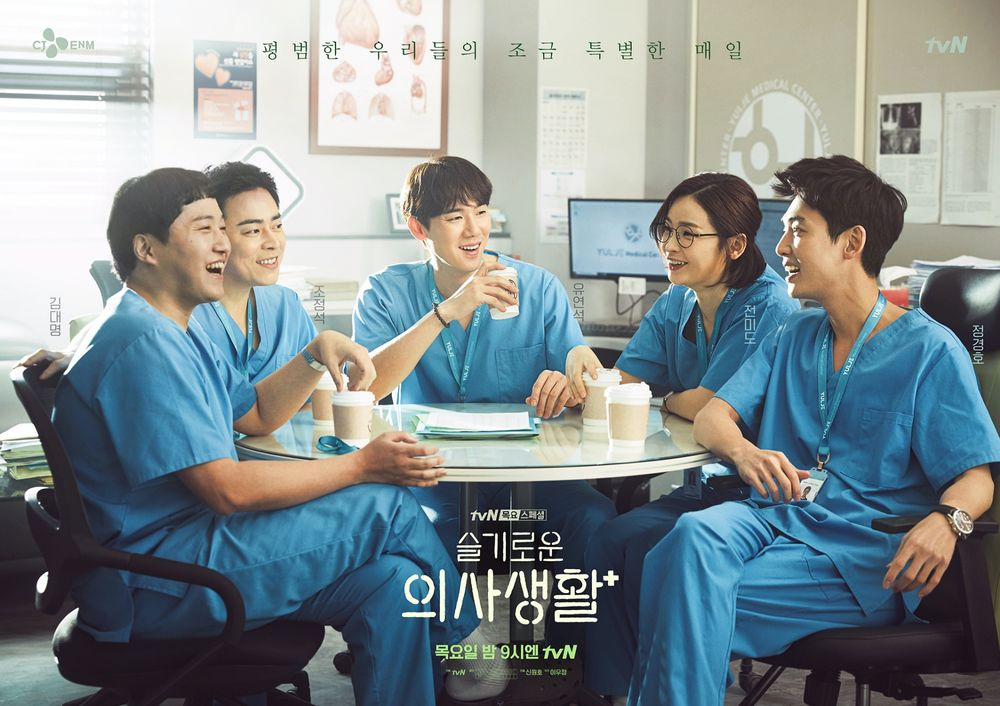

In [ ]:
# Load an image on internet
image = cv2.imread('myYolo.jpg')
cv2_imshow(image)

In [ ]:
# Detect objects on the image using the YOLO
results = yolov5(image)
objects = results.xyxyn[0].detach().cpu().numpy()

# Rescale object locations
h, w, _ = image.shape
objects[:,0:4] = objects[:,0:4] * [w, h, w, h]

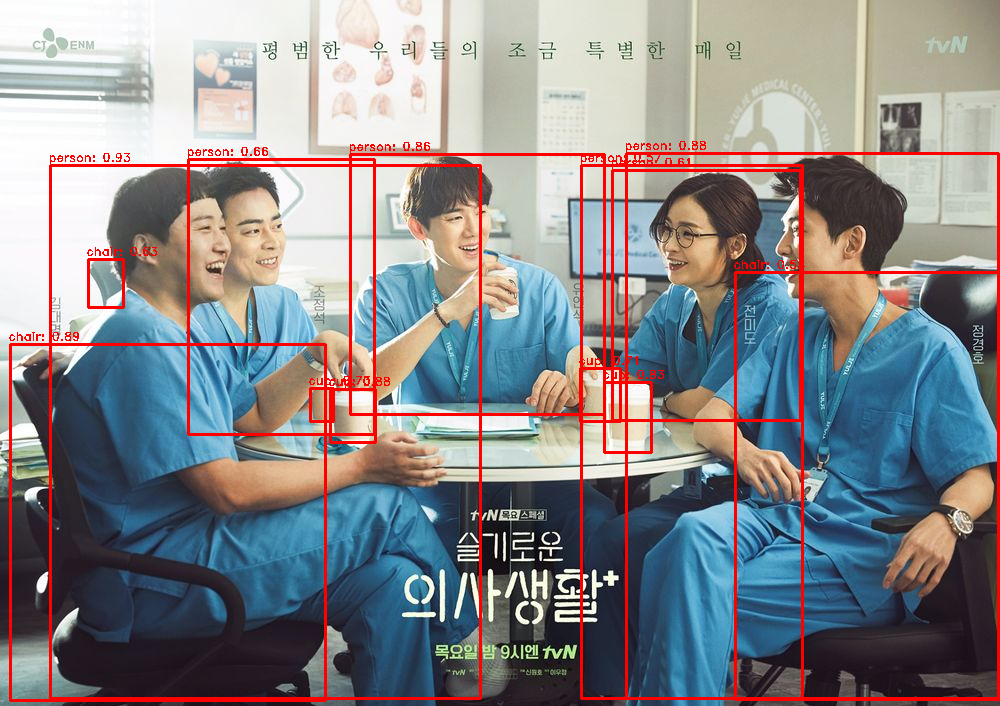

In [ ]:
# Show the image with results
classes = [ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
            'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
            'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
            'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
            'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
            'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
            'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
            'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush' ]
for obj in objects:
    if obj[-2] > 0.5: # More than 0.5 confidence
        tl, br = obj[0:2].astype('int'), obj[2:4].astype('int')
        cv2.rectangle(image, tuple(tl), tuple(br), (0, 0, 255), 2)
        cv2.putText(image, f'{classes[int(obj[-1])]}: {obj[-2]:.2f}', tuple(tl + (-2, -4)), cv2.FONT_HERSHEY_DUPLEX, 0.4, (0, 0, 255))
cv2_imshow(image)